<a href="https://colab.research.google.com/github/rrizqiaa/MachineLearningTasks/blob/main/2stWeekTask/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification model: Klasifikasi kualitas air sungai citarum (logistics model)

   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  
Accuracy: 0.96
Precision: 0.98
Recall: 0.94
F1 Score: 0.96
AUC-ROC: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


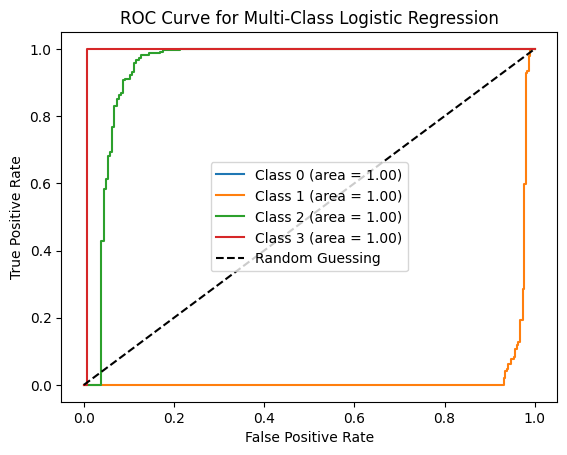

In [24]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('CitarumWater.csv')

# View the first few rows of the dataset to understand the structure
print(data.head())

# Data Preprocessing

# Drop any rows with missing values (if needed)
data = data.dropna()

# Convert temperature to a numeric format (remove '°C' symbol)
# Convert temperature to a numeric format (remove '°C' symbol)
# Make sure to handle any trailing spaces or other characters that could interfere with conversion
data['Temp'] = data['Temp'].str.replace('°C', '', regex=False).astype(float)

# Now continue with the rest of the code...


# Define feature variables (X) and the target variable (y)
X = data[['pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP']]  # Features
y = data['Class']  # Target

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Evaluate the model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1:.2f}')

# AUC-ROC Score
# Get the probabilities for all classes, not just the positive class
y_pred_prob = model.predict_proba(X_test)

# AUC-ROC Score for multi-class classification
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'AUC-ROC: {roc_auc:.2f}')

# Plot ROC curve for each class
fpr = {}
tpr = {}
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)

# Plot ROC curve
plt.figure()
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Logistic Regression')
plt.legend(loc='best')
plt.show()



## Explanation of Code:

1. **Data Preprocessing**:  
   - We load the dataset and clean it by handling missing values and converting temperature to numeric.  
   - The features (`pH`, `Temp`, `TSS`, etc.) are separated into `X`, while the target variable (`Class`) is stored in `y`.
   - We split the dataset into training and testing sets to avoid overfitting.

2. **Feature Scaling**:  
   - The features are standardized using `StandardScaler` to ensure all features are on the same scale, which is important for logistic regression.

3. **Model Training**:  
   - We train a logistic regression model on the training data using `LogisticRegression()` from Scikit-learn.

4. **Prediction and Evaluation**:  
   - The model predicts water quality classification for the test data.
   - We compute several evaluation metrics:
     - **Accuracy**: Measures the overall correctness of the model.
     - **Precision**: Measures the proportion of correct positive predictions.
     - **Recall**: Measures how well the model identifies positive cases.
     - **F1 Score**: Harmonic mean of precision and recall, balancing the two metrics.
     - **AUC-ROC**: The Area Under the ROC Curve, which evaluates how well the model distinguishes between classes.

5. **ROC Curve**:  
   - We plot the ROC curve, which shows the performance of the classification model at different thresholds.

This covers the full pipeline for building a logistic regression classifier for the Citarum river water quality, complete with evaluation metrics.

# Regression model: Linear regresi dengan basis fungsi (linear model)

Linear Regression:
RMSE: 1.9735, MSE: 3.8949, R^2: 0.9291

Polynomial Regression (Basis Function):
RMSE: 1.9565, MSE: 3.8280, R^2: 0.9303


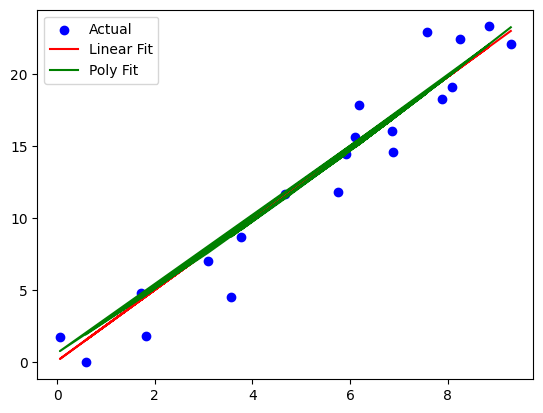

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Generate dummy financial market data or load your own financial dataset
# Assume X is some feature (e.g. time, volume) and y is the target (e.g. stock price)
X = np.random.rand(100, 1) * 10  # Random data simulating time or volume
y = 2.5 * X + np.random.randn(100, 1) * 2  # Stock price with some noise

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model 1: Ordinary Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)

# 3. Model 2: Polynomial Regression (Basis Function)
poly = PolynomialFeatures(degree=2)  # Try degree 2 for polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions with polynomial model
y_pred_poly = poly_model.predict(X_test_poly)

# 4. Evaluation
# Metrics for Linear Model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Metrics for Polynomial Model
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Print results
print("Linear Regression:")
print(f"RMSE: {rmse_linear:.4f}, MSE: {mse_linear:.4f}, R^2: {r2_linear:.4f}")

print("\nPolynomial Regression (Basis Function):")
print(f"RMSE: {rmse_poly:.4f}, MSE: {mse_poly:.4f}, R^2: {r2_poly:.4f}")

# Optionally, visualize the results
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred_linear, color="red", label="Linear Fit")
plt.plot(X_test, y_pred_poly, color="green", label="Poly Fit")
plt.legend()
plt.show()


## Penjelasan:

Model Regresi Linear Biasa: Kita menggunakan model LinearRegression dari Scikit-learn.

Model Regresi dengan Basis Fungsi: Polinomial derajat 2 digunakan sebagai contoh basis fungsi. Kamu bisa bereksperimen dengan derajat lain atau menggunakan fungsi basis lain seperti Radial Basis Functions (RBF).

Evaluasi:

MSE (Mean Squared Error) menghitung rata-rata kesalahan kuadrat.
RMSE (Root Mean Squared Error) adalah akar dari MSE, lebih mudah diinterpretasikan karena dalam skala yang sama dengan data.
R-squared mengukur seberapa baik model cocok dengan data (nilai 1 menunjukkan kecocokan sempurna).